# Fundamentals of Social Data Science — Group Project 2

## Question: On average, do posts under "AskMen" (M), "AskWomen" (W), "TooAfraidtoask" (A) have different number of comments?

## Hypothesis

|Hypothesis|Elaboration|
|:-----|:-----|
|Null Hypothesis, $H_0$|$\mu_M = \mu_W = \mu_A$|
|Alternative Hypothesis, $H_1$|The mean are non-equal|

### Step 0: Import pre-requisite libraries

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import os
import pickle
from models.reddit_scraper import RedditScraper
from config.settings import USER_AGENT
from utils.analysis import *
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
from utils.network_builder import *
import time
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

### Step 1: Scrape and load data from Reddit

1. Specify subreddits we are interested in 

2. For each subreddit, perform the function `scrapesubreddit_convertoDF`

    a. Load 30 posts (`numberofposts = 30`)

    b. Create a dataframe containing all the posts (`posts_df`)

    c. Create a dataframe containing all the comments for all posts under the subreddit (`comments_df`)

3. **Output is 6 dataframes**

|Label|What it is|
|:-----|:-----|
|`AskMen_posts_df`|Dataframe containing all the **posts** under subreddit **_AskMen_**|
|`AskMen_comments_df`|Dataframe containing all the **comments** under subreddit **_AskMen_**|
|`AskWomen_posts_df`|Dataframe containing all the **posts** under subreddit **_AskWomen_**|
|`AskWomen_comments_df`|Dataframe containing all the **comments** under subreddit **_AskWomen_**|
|`TooAfraidtoask_posts_df`|Dataframe containing all the **posts** under subreddit **_TooAfraidtoask_**|
|`TooAfraidtoask_comments_df`|Dataframe containing all the **comments** under subreddit **_TooAfraidtoask_**|



In [28]:
# 1. Load the scraper
scraper = RedditScraper(USER_AGENT)

# 2. Define function to 
    # (1) load posts from the subreddit and convert into a dataframe, 
    # (2) load comments for each post and convert into a dataframe

def scrapesubreddit_converttoDF(scraper, subreddit_name, numberofposts):
    posts = scraper.get_subreddit_posts(subreddit_name, limit=numberofposts, cache=False, sort="hot")
        # Filter posts based on 'hot'
    posts_df = pd.DataFrame(posts)

        # This is the dataframe for ALL posts under the subreddit

    comment_list = []
    for post in posts:
        comments = scraper.get_post_comments(post['id'])
        comment_list.append(pd.DataFrame(comments))
        time.sleep(2)

    comments_df = pd.concat(comment_list)

    return posts_df, comments_df

In [29]:
# 3. Standardise number of posts to download

numberofposts = 50

In [30]:
# 3a. For subreddit AskMen

subreddit_name_1 = "AskMen"
numberofposts_1 = numberofposts

AskMen_posts_df, AskMen_comments_df = scrapesubreddit_converttoDF(scraper, subreddit_name_1, numberofposts_1)

Fetching posts from https://api.reddit.com/r/AskMen/hot
Response keys: dict_keys(['kind', 'data'])
Fetching comments from https://api.reddit.com/comments/1cvy93s
Fetching comments from https://api.reddit.com/comments/1gllxd8
Fetching comments from https://api.reddit.com/comments/1gloykx
Fetching comments from https://api.reddit.com/comments/1gl5i9p
Fetching comments from https://api.reddit.com/comments/1gl8zus
Fetching comments from https://api.reddit.com/comments/1glbxkd
Fetching comments from https://api.reddit.com/comments/1gli80m
Fetching comments from https://api.reddit.com/comments/1gll5r0
Fetching comments from https://api.reddit.com/comments/1gls2ih
Fetching comments from https://api.reddit.com/comments/1glsn6h
Fetching comments from https://api.reddit.com/comments/1glq50e
Fetching comments from https://api.reddit.com/comments/1glq9ud
Fetching comments from https://api.reddit.com/comments/1gkv123
Fetching comments from https://api.reddit.com/comments/1glqi9p
Fetching comments f

In [31]:
# 3b. For subreddit AskWomen

subreddit_name_2 = "AskWomen"
numberofposts_2 = numberofposts

AskWomen_posts_df, AskWomen_comments_df = scrapesubreddit_converttoDF(scraper, subreddit_name_2, numberofposts_2)

Fetching posts from https://api.reddit.com/r/AskWomen/hot
Response keys: dict_keys(['kind', 'data'])
Fetching comments from https://api.reddit.com/comments/1glivrt
Fetching comments from https://api.reddit.com/comments/1glk82k
Fetching comments from https://api.reddit.com/comments/1gl302u
Fetching comments from https://api.reddit.com/comments/1glbp1v
Fetching comments from https://api.reddit.com/comments/1gl9vci
Fetching comments from https://api.reddit.com/comments/1glbnmr
Fetching comments from https://api.reddit.com/comments/1glbqmm
Fetching comments from https://api.reddit.com/comments/1gkyblo
Fetching comments from https://api.reddit.com/comments/1glt50m
Fetching comments from https://api.reddit.com/comments/1gl7r9v
Fetching comments from https://api.reddit.com/comments/1glooo8
Fetching comments from https://api.reddit.com/comments/1gll8it
Fetching comments from https://api.reddit.com/comments/1glfvuz
Fetching comments from https://api.reddit.com/comments/1gkgq5x
Fetching comments

In [33]:
# 3c. For subreddit TooAfraidToAsk

subreddit_name_3 = "TooAfraidToAsk"
numberofposts_3 = numberofposts

TooAfraidToAsk_posts_df, TooAfraidToAsk_comments_df = scrapesubreddit_converttoDF(scraper, subreddit_name_3, numberofposts_3)

Fetching posts from https://api.reddit.com/r/TooAfraidToAsk/hot
Response keys: dict_keys(['kind', 'data'])
Fetching comments from https://api.reddit.com/comments/14qcjv9
Fetching comments from https://api.reddit.com/comments/1eatq3y
Fetching comments from https://api.reddit.com/comments/1glgh0a
Fetching comments from https://api.reddit.com/comments/1glimg1
Fetching comments from https://api.reddit.com/comments/1gls3tv
Fetching comments from https://api.reddit.com/comments/1glgeku
Fetching comments from https://api.reddit.com/comments/1glolmt
Fetching comments from https://api.reddit.com/comments/1glpzlj
Fetching comments from https://api.reddit.com/comments/1gle8pm
Fetching comments from https://api.reddit.com/comments/1glheoi
Fetching comments from https://api.reddit.com/comments/1gloun8
Fetching comments from https://api.reddit.com/comments/1gl6vot
Fetching comments from https://api.reddit.com/comments/1gllx90
Fetching comments from https://api.reddit.com/comments/1gl8vmh
Fetching co

### Step 2: Find the average depth of ALL comment trees (ie ALL posts) under each subreddit

ie Find the average length of all chains from root nodes to leaf nodes across all posts

In [106]:
# 1. Define function to obtain average depth of each comment tree (ie each post)

def find_all_chain_length(G):
    """
    Calculate the average length of chains of sequential nodes in the directed graph G.
    """
    chain_lengths = []
    
    # Find all root nodes (nodes with no incoming edges)
    for node in G.nodes:
        if G.in_degree(node) == 0:
            # Calculate the length of each chain starting from the root node
            # Inclusive of root node
            path_lengths = nx.single_source_dijkstra_path_length(G, node)

            # Add each chain length to the chain_lengths list
            chain_lengths.extend(path_lengths.values())

    return chain_lengths

    

In [110]:
# 2. Define function to obtain average depth of all comment trees (ie all posts) under each subreddit


def average_depth_per_subreddit(posts_df, comments_df, subreddit):

    """
    2a. Iterate the function across ALL posts in the posts_df for each subreddit
    """

    all_posts_chain_depth = [] # Create the list to contain the chain length of every single chain in the subreddit

    for i in posts_df['id']:

        post_i_comments = comments_df[comments_df['post_id'] == i]



        """
        2b. For each post, create a directed network of comments with optional root nodes.
        """

        comment_tree = create_comment_tree(post_i_comments, include_root=True)

        """
        2c. For each post, find the length of all chains of sequential nodes in each comment tree (directed graph G)
        """

        list_of_all_chain_depth = find_all_chain_length(comment_tree)


        # """
        # 2c. For each post, calculate the average length of chains of sequential nodes in each comment tree (directed graph G)
        # """

        # average_depth = calculate_average_chain_length(comment_tree)
        

        """
        2d. For each post, append the the list of all chain depths to `all_posts_chain_lengths`
        """

        all_posts_chain_depth.extend(list_of_all_chain_depth)



    """
    2e. For each subreddit, plot the distribution of average depth for each post
    """

    # Define the number of bins
    min_depth = min(all_posts_chain_depth)
    max_depth = max(all_posts_chain_depth)
    num_bins = range(min_depth, max_depth + 2)

    # Set up the plot
    plt.figure(figsize=(5, 3))
    sns.histplot(all_posts_chain_depth, bins=10, kde=False, color='skyblue', discrete = True)

    # Add labels and title
    plt.xlabel("Depth of Posts within subreddit")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Depth across posts in the subreddit {subreddit}")
    plt.xticks(range(min_depth, max_depth + 1))



    """
    2f. Across all posts (comment trees), calculate the average depth (average length of chains of sequential nodes)
    """

    subreddit_average_depth = sum(all_posts_chain_depth) / len(all_posts_chain_depth) if all_posts_chain_depth else 0


    """
    2g. Convert the list of depths across all posts in the subreddit into a DataFrame
    """

    subreddit_all_depth_df = pd.DataFrame(all_posts_chain_depth, columns = ["Depth"])


    """
    2h. Return the average depth across all posts of each subreddit, and the dataframe containing all the average depths of each post within the subreddit
    """


    return subreddit_average_depth, subreddit_all_depth_df
        





Average depth across all posts in subreddit AskMen is 1.80984


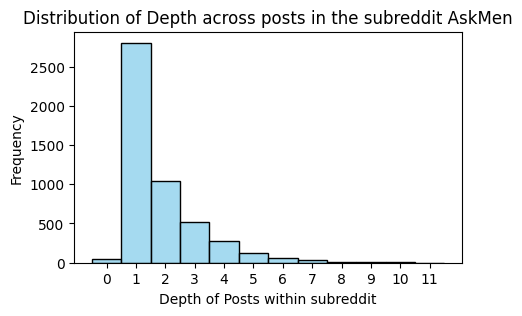

In [112]:
# 3a. Average depth for AskMen

AskMen_average_depth, AskMen_all_depth_df = average_depth_per_subreddit(AskMen_posts_df, AskMen_comments_df, subreddit_name_1)

print(f"Average depth across all posts in subreddit AskMen is {AskMen_average_depth:.5f}")

Average depth across all posts in subreddit AskWomen is 1.49976


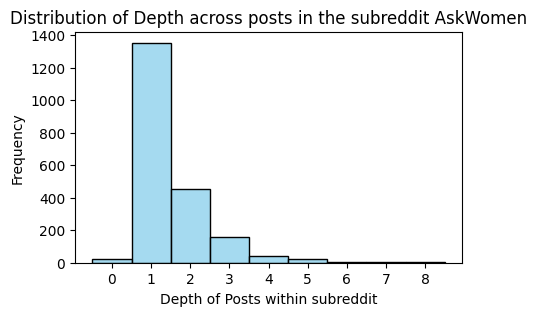

In [111]:
# 3b. Average depth for AskWomen

AskWomen_average_depth, AskWomen_all_depth_df = average_depth_per_subreddit(AskWomen_posts_df, AskWomen_comments_df, subreddit_name_2)

print(f"Average depth across all posts in subreddit AskWomen is {AskWomen_average_depth:.5f}")

Average depth across all posts in subreddit TooAfraidtoask is 2.00000


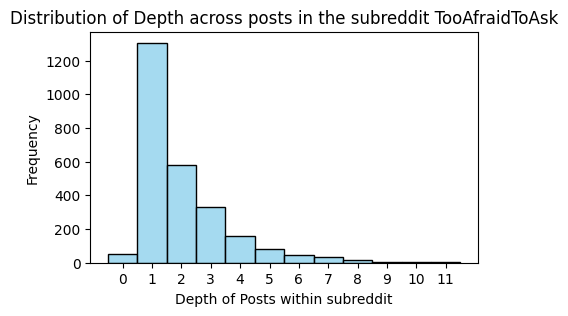

In [113]:
# 3c. Average depth for TooAfraidtoask

TooAfraidToAsk_average_depth, TooAfraidToAsk_all_depth_df = average_depth_per_subreddit(TooAfraidToAsk_posts_df, TooAfraidToAsk_comments_df, subreddit_name_3)

print(f"Average depth across all posts in subreddit TooAfraidtoask is {TooAfraidToAsk_average_depth:.5f}")

### Step 4: Conduct **pair-wise KS Test** to test whether there is any statistically significant difference in distributions of depth across posts in each subreddit

Null Hypothesis is that each pair of distributions have the same distribution of depth across posts in each subreddit

Alternative Hypothesis is that the distributions are not identical

#### Step 4.1: Define function for 2-sample KS Test

In [130]:
# 1. Define function for KS Test

def KS_Test (sample1, sample2, significance_level, subreddit1, subreddit2):


    # Obtain results
    ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

    # Present results
    print(f"Results of 2-Sample KS Test for {subreddit1} and {subreddit2}:")
    print(f"KS Statistic: {ks_statistic: .3f}")
    print(f"P-Value: {p_value:.3f}")


    # Conditional Conclusion
    if p_value > significance_level:
        print(f'''\nSince p-value = {p_value:.3f} > 0.05,
            at 5% significance level we do not reject the null hypothesis
            and conclude that there is no statistically significant difference across the distributions''')
    
    else: 
        print(f'''\nSince p-value = {p_value:.3f} < 0.05,
            at 5% significance level we reject the null hypothesis
            and conclude that there is a statistically significant difference across the distributions''')

In [133]:
# Standardise significance level

alpha = 0.05

#### Step 4.2: 2-Sample KS Test for AskMen and AskWomen

In [134]:
# 2.  2-Sample KS Test for AskMen and AskWomen

KS_Test(AskMen_all_depth_df['Depth'], AskWomen_all_depth_df['Depth'], alpha, subreddit_name_1, subreddit_name_2)

Results of 2-Sample KS Test for AskMen and AskWomen:
KS Statistic:  0.094
P-Value: 0.000

Since p-value = 0.000 < 0.05,
            at 5% significance level we reject the null hypothesis
            and conclude that there is a statistically significant difference across the distributions


#### Step 4.3: 2-Sample KS Test for AskWomen and TooAfraidToAsk

In [135]:
# 3.  2-Sample KS Test for AskWomen and TooAfraidToAsk

KS_Test(AskWomen_all_depth_df['Depth'], TooAfraidToAsk_all_depth_df['Depth'], alpha, subreddit_name_2, subreddit_name_3)

Results of 2-Sample KS Test for AskWomen and TooAfraidToAsk:
KS Statistic:  0.147
P-Value: 0.000

Since p-value = 0.000 < 0.05,
            at 5% significance level we reject the null hypothesis
            and conclude that there is a statistically significant difference across the distributions


#### Step 4.4: 2-Sample KS Test for AskMen and TooAfraidToAsk

In [137]:
# 4.  2-Sample KS Test for AskMen and TooAfraidToAsk

KS_Test(AskMen_all_depth_df['Depth'], TooAfraidToAsk_all_depth_df['Depth'], alpha, subreddit_name_1, subreddit_name_3)


Results of 2-Sample KS Test for AskMen and TooAfraidToAsk:
KS Statistic:  0.061
P-Value: 0.000

Since p-value = 0.000 < 0.05,
            at 5% significance level we reject the null hypothesis
            and conclude that there is a statistically significant difference across the distributions


### Step 5: Conduct a **one-way ANOVA** to test equality in distributions of depth across posts in each subreddit

Null Hypothesis is that all the distributions have the same distribution of depth across posts in each subreddit

Alternative Hypothesis is that the distributions are not identical

### Step 5: Conduct a **one-way ANOVA** to test equality in distributions of depth across posts in each subreddit

Null Hypothesis is that there is no difference in group means in the distribution of depth across posts in each subreddit

Alternative Hypothesis is that there is a difference in group means in the distribution of depth across posts in each subreddit

In [116]:
# 1. Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(AskMen_all_depth_df['Depth'], AskWomen_all_depth_df['Depth'], TooAfraidToAsk_all_depth_df['Depth'])

significance_level = 0.05

# 2a. Print the results
print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

print("="*50)

# 2b. Conditional Conclusion
if p_value > significance_level:
    print(f'''Since p-value = {p_value:.3f} > 0.05,
          at 5% significance level we do not reject the null hypothesis
          and conclude that there is no statistically significant difference across the distributions''')
    
else: 
    print(f'''Since p-value = {p_value:.3f} < 0.05,
          at 5% significance level we reject the null hypothesis
          and conclude that there is a statistically significant difference across the distributions''')

One-way ANOVA Results:
F-statistic: 87.778
p-value: 0.000
Since p-value = 0.000 < 0.05,
          at 5% significance level we reject the null hypothesis
          and conclude that there is a statistically significant difference across the distributions


### Step 6: Conduct a **Tukey's HSD** to test pairwise equality in distributions of depth across posts in each subreddit

Null Hypothesis is that there is no difference in group means in the distribution of depth across posts in each subreddit

Alternative Hypothesis is that there is a difference in group means in the distribution of depth across posts in each subreddit

In [118]:
# 1. Add a column to each dataframe specifying the subreddit

AskMen_all_depth_df["subreddit"] = subreddit_name_1

AskWomen_all_depth_df["subreddit"] = subreddit_name_2

TooAfraidToAsk_all_depth_df["subreddit"] = subreddit_name_3


# 2. Concatenate all the dataframes together

combined_depth_df = pd.concat([AskMen_all_depth_df, AskWomen_all_depth_df, TooAfraidToAsk_all_depth_df], ignore_index = True)


# 3. Conduct Tukey's HSD

tukey_results = pairwise_tukeyhsd(combined_depth_df['Depth'], combined_depth_df['subreddit'])


# 4. Print results of Tukey's HSD

print("\nTukey's HSD Test Results:")
print(tukey_results)




Tukey's HSD Test Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1      group2     meandiff p-adj  lower   upper  reject
-------------------------------------------------------------
  AskMen       AskWomen  -0.3101   0.0 -0.3892 -0.2309   True
  AskMen TooAfraidToAsk   0.1902   0.0  0.1171  0.2632   True
AskWomen TooAfraidToAsk   0.5002   0.0  0.4114  0.5891   True
-------------------------------------------------------------


Since p-value for all pair-wise comparisons are < 0.05, hence at 5% significance level, we reject the null hypothesis for these all cases